# Part 2:

## Change loss function from $loss=\frac{1}{n}\sum{(y_i - \hat{y_i})^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$,and using your mathmatical knowledge to get the right partial formual.Implemen the gradient descent code.

### $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$
### $\frac{\partial loss}{\partial k} = \frac{1}{n}\sum{}\begin{cases} -x_i , y_i > \hat{y_i}\\ x_i , y_i <= \hat{y_i} \end{cases}$
### $\frac{\partial loss}{\partial b}=\frac{1}{n}\sum{}\begin{cases}-1,y_i > \hat{y_i}\\ 1,y_i <= \hat{y_i} \end{cases}$

In [1]:
def partial_k(x,y,y_hat):
    '''compute the partial of k'''
    gradient = 0
    
    n = len(y)
    
    for x_i,y_i,y_hat_i in zip(list(x),list(y),list(y_hat)):
        gradient = gradient + x_i if y_i <= y_hat_i else gradient - x_i
        
    return gradient / n

In [2]:
def partial_b(x,y,y_hat):
    '''compute the partial of b'''
    gradient = 0
    
    n = len(y)
    
    for y_i,y_hat_i in zip(list(y),list(y_hat)):
        gradient = gradient + 1 if y_i <= y_hat_i else gradient - 1
        
    return gradient / n

In [3]:
def price(rm,k,b):
    '''return k*rm + b'''
    return rm * k + b

In [4]:
def loss(y,y_hat):
    n = len(y)
    return sum([abs(y_i - y_hat_i) for y_i,y_hat_i in zip(y,y_hat)]) / n

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import random

In [7]:
from sklearn.datasets import load_boston

In [8]:
data = load_boston()

In [9]:
x,y = data['data'],data['target']

In [10]:
x_rm = x[:,5]

In [11]:
def draw_rm_and_price():
    plt.scatter(x_rm,y)

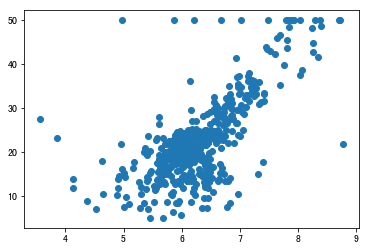

In [15]:
draw_rm_and_price()

In [29]:
trying_times = 20000

min_loss = float('inf')

current_k = random.random() * 200 - 100
current_b = random.random() * 200 - 100

learning_rate = 1e-01

for i in range(trying_times):
    price_by_k_and_b = [price(r,current_k,current_b) for r in x_rm]
    
    current_loss = loss(y,price_by_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k,best_b = current_k,current_b
        
        if i % 50 == 0:
            print('When time is {},get the best_k:{},and best_b:{},the loss is {}'.format(i,best_k,best_b,min_loss))
    
    k_gradient = partial_k(x_rm,y,price_by_k_and_b)
    b_gradient = partial_b(x_rm,y,price_by_k_and_b)
    
    current_k = current_k + (-1 * learning_rate) * k_gradient
    current_b = current_b + (-1 * learning_rate) * b_gradient

When time is 0,get the best_k:76.50432178961213,and best_b:-98.89616562008597,the loss is 359.37271955582565
When time is 50,get the best_k:45.08114985285306,and best_b:-103.89616562008568,the loss is 156.8895726424024
When time is 100,get the best_k:20.564279497121742,and best_b:-107.69379407858364,the loss is 7.347944294179368
When time is 150,get the best_k:20.50735261965131,and best_b:-107.35782569913721,the loss is 7.324721209906077
When time is 200,get the best_k:20.45042574218088,and best_b:-107.02185731969078,the loss is 7.301498125632796
When time is 250,get the best_k:20.39857159198318,and best_b:-106.68509842641035,the loss is 7.278279678733929
When time is 300,get the best_k:20.344181078149116,and best_b:-106.34873479004692,the loss is 7.255059406474194
When time is 350,get the best_k:20.295298864710315,and best_b:-106.01158063984948,the loss is 7.231847744099761
When time is 400,get the best_k:20.245426532694456,and best_b:-105.67482174656897,the loss is 7.208670397177282


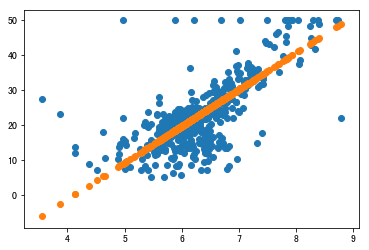

In [31]:
x,y = data['data'],data['target']
x_rm = x[:,5]
k = 10.507635228345396
b = -43.33173874262709
price_by_k_and_b = [price(r,k,b) for r in x_rm] # when k and b like this,get the smallest loss:4.449

draw_rm_and_price()
plt.scatter(x_rm,price_by_k_and_b)

# Part 3:

In [66]:
solution = {}

In [67]:
from functools import lru_cache

In [121]:
@lru_cache(maxsize = 2 ** 10)
def edit_distance(string1,string2):

    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
    
    candidates = [
        (edit_distance(string1[:-1],string2) + 1,'DEL {}'.format(tail_s1)), # string 1 delete tail
        (edit_distance(string1,string2[:-1]) + 1,'ADD {}'.format(tail_s2)), # string 1 add tail of string2
    ]
    
    if tail_s1 == tail_s2:
        both_forward = (edit_distance(string1[:-1],string2[:-1]) + 0, '')
    else:
        both_forward = (edit_distance(string1[:-1],string2[:-1]) + 1, 'SUB {} => {}'.format(tail_s1,tail_s2))
    
    candidates.append(both_forward)
    
    min_distance, operation = min(candidates,key = lambda x:x[0])
    
    solution[(string1,string2)] = operation
    
    return min_distance

In [69]:
edit_distance('ABCDE','ABCCEF')

2

In [70]:
solution

{('A', 'A'): '',
 ('A', 'AB'): 'ADD B',
 ('A', 'ABC'): 'ADD C',
 ('A', 'ABCC'): 'ADD C',
 ('A', 'ABCCE'): 'ADD E',
 ('A', 'ABCCEF'): 'ADD F',
 ('AB', 'A'): 'DEL B',
 ('AB', 'AB'): '',
 ('AB', 'ABC'): 'ADD C',
 ('AB', 'ABCC'): 'ADD C',
 ('AB', 'ABCCE'): 'ADD E',
 ('AB', 'ABCCEF'): 'ADD F',
 ('ABC', 'A'): 'DEL C',
 ('ABC', 'AB'): 'DEL C',
 ('ABC', 'ABC'): '',
 ('ABC', 'ABCC'): 'ADD C',
 ('ABC', 'ABCCE'): 'ADD E',
 ('ABC', 'ABCCEF'): 'ADD F',
 ('ABCD', 'A'): 'DEL D',
 ('ABCD', 'AB'): 'DEL D',
 ('ABCD', 'ABC'): 'DEL D',
 ('ABCD', 'ABCC'): 'SUB D => C',
 ('ABCD', 'ABCCE'): 'ADD E',
 ('ABCD', 'ABCCEF'): 'ADD F',
 ('ABCDE', 'A'): 'DEL E',
 ('ABCDE', 'AB'): 'DEL E',
 ('ABCDE', 'ABC'): 'DEL E',
 ('ABCDE', 'ABCC'): 'DEL E',
 ('ABCDE', 'ABCCE'): '',
 ('ABCDE', 'ABCCEF'): 'ADD F'}

In [123]:
result = [] # 记录字符串1转换到字符串2的步骤

In [122]:
@lru_cache(maxsize = 2**10)
def parse_solution(left_str,right_str):
    '''parse the solution'''
    if left_str == right_str: return 
   
    tuple_str = left_str,right_str
    operation = solution[tuple_str]
    if operation:
        result.append(left_str+' => '+right_str+' : '+operation)
    
    if not operation or operation[0] == 'S':
        return parse_solution(left_str[:-1],right_str[:-1])
    elif operation[0] == 'D':
        return parse_solution(left_str[:-1],right_str)
    elif operation[0] == 'A':
        return parse_solution(left_str,right_str[:-1])


In [124]:
parse_solution('ABCDE','ABCCEF')

In [125]:
result

['ABCDE => ABCCEF : ADD F', 'ABCD => ABCC : SUB D => C']

In [6]:
from functools import lru_cache

In [7]:
solution = {}

In [88]:
@lru_cache(maxsize = 2**10)
def edit_distance_1(str1,str2):
    '''another edit distance'''
    if len(str1) == 0:
        return len(str2)
    elif len(str2) == 0:
        return len(str1)
    elif str1 == str2:
        return 0
    
    if str1[-1] == str2[-1]:
        d = 0
    else:
        d = 1
    
    return min(edit_distance(str1[:-1],str2) + 1,
              edit_distance(str1,str2[:-1]) + 1,
              edit_distance(str1[:-1],str2[:-1] )+ d)    

# Part 4:

Fluent Python & Hands on Tensorflow

### Part 5-1 Review machine learning

1. Why do we use Derivative / Gredient to fit a target function?¶


Ans:通过有方向的监督学习减少计算次数，并通过导数的计算加快计算进程

2. In the words 'Gredient Descent', what's the Gredient and what's the Descent?¶

Ans:我们的目标是找到使目标函数下降最快的方向，而最快的方向就是最陡峭的地方即最大的方向导数，这个方向导数就是梯度，下降是指为了使目标函数减少而使自变量朝着梯度相反的方向变化的意思

3. What's the advantages of the 3rd gradient descent method compared to the previous methods?

Ans:有方向性，可以选择变化幅度从而减少大量运算量

4. Using the simple words to describe: What's the machine leanring.¶

Ans: 机器学习是通过编程让计算机从数据中进行学习的科学

### Part 5: Answer following questions: 

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problme? 

Ans:1.动态规划是用来获取最优状态的一种方法。2.搜索算法是指每个阶段的最优状态是由之前所有阶段的状态的组合得到的；而动态规划是指每个阶段的最优状态可以从之前某个阶段的某个或某些状态直接得到而不管之前这个状态是如何得到的。

2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

Ans：动态规划是用来获取最优状态的一种算法，在机器学习应用中可以用来减少重复的计算量提高运行效率，与机器学习算法是相辅相成的

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

Ans:有n级台阶有多少种走台阶的方法；给定数组arr返回arr的最长递增子序列；八皇后问题；Edit distance；背包问题

4. Can you catch up at least 3 problems wich could sloved by Edit Distance? 

Ans:计算两个字串的相似度；检查拼写错误；网络搜索

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

Ans:最优子结构：每一个阶段最优问题的求解；边界：递推到根部时答案的确定；状态方程：从顶部从底部状态变化的方程

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

Ans:无后效性（马尔科夫性）：如果某阶段状态给定后，则在这个阶段以后过程的发展不受这个阶段以前各段状态的影响；
过程的过去历史只能通过当前的状态去影响它未来的发展；构造动态规划模型时，要充分注意是否满足无后效性的要求；

## Part 6 Preparation of Project-01

1. Using python Flask or Bottle to finish your first simple web app:
> https://bottlepy.org/

2. Learn what's the SQL, and try some simple SQL operations:
> https://www.w3schools.com/sql/sql_intro.asp

3. Learn what's the HTML ( *ONLY* need to know the basic things)
> https://getbootstrap.com/; https://www.w3schools.com/html/